In [1]:
#import necessary pacakges
import pandas as pd
import seaborn as sns

# Overview of the COVID-19 cases data

In [8]:
covid_county = pd.read_csv('us-counties.csv')

In [9]:
covid_county.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [10]:
def unique(county):
    unique_county = []
    for x in county:
        if x not in unique_county:
            unique_county.append(x)
    return unique_county
county_withdup = []
for col in covid_county.county:
    county_withdup.append(col)

In [11]:
unique_county = unique(county_withdup)

In [12]:
covid_19_2020 = covid_county.loc[covid_county['date'] == '2020-12-31']

In [13]:
covid_19_2020.head()

,date,county,state,fips,cases,deaths
881492,2020-12-31,Autauga,Alabama,1001.0,4190,48.0
881493,2020-12-31,Baldwin,Alabama,1003.0,13601,161.0
881494,2020-12-31,Barbour,Alabama,1005.0,1514,32.0
881495,2020-12-31,Bibb,Alabama,1007.0,1834,46.0
881496,2020-12-31,Blount,Alabama,1009.0,4641,63.0


In [14]:
covid_19_2020 = covid_19_2020.drop(['date'], axis = 1)
covid_19_2020 = covid_19_2020.drop(['deaths'], axis = 1)
covid_19_2020 = covid_19_2020.drop(['fips'], axis = 1)

In [15]:
covid_19_2020

,county,state,cases
881492,Autauga,Alabama,4190
881493,Baldwin,Alabama,13601
881494,Barbour,Alabama,1514
881495,Bibb,Alabama,1834
881496,Blount,Alabama,4641
...,...,...,...
884732,Sweetwater,Wyoming,2966
884733,Teton,Wyoming,2138
884734,Uinta,Wyoming,1558
884735,Washakie,Wyoming,780


As each of the county does not have a corresponding state with it, which is difficult to combine the different dataframe together, I preprocess the county and state to combien them together to make sure there are same keys to combine all the data together for regression analysis. 

In [16]:
#the county name may be the same in diferent states
covid_19_2020['county_with_state'] = covid_19_2020['county'] + ' ' + 'County' + ',' + ' ' + covid_19_2020['state']

In [41]:
covid_19_2020

,county,state,cases,county_with_state
881492,Autauga,Alabama,4190,"Autauga County, Alabama"
881493,Baldwin,Alabama,13601,"Baldwin County, Alabama"
881494,Barbour,Alabama,1514,"Barbour County, Alabama"
881495,Bibb,Alabama,1834,"Bibb County, Alabama"
881496,Blount,Alabama,4641,"Blount County, Alabama"
...,...,...,...,...
884732,Sweetwater,Wyoming,2966,"Sweetwater County, Wyoming"
884733,Teton,Wyoming,2138,"Teton County, Wyoming"
884734,Uinta,Wyoming,1558,"Uinta County, Wyoming"
884735,Washakie,Wyoming,780,"Washakie County, Wyoming"


# Load the control variables and combine all the data together 

In [17]:
control_variables = pd.read_csv("combine_data.csv")

In [18]:
control_variables = control_variables.rename(columns={'Geographic Area Name': 'county_with_state'})

In [19]:
covid_income = pd.merge(covid_19_2020, control_variables, on = 'county_with_state')

In [21]:
covid_income.head()

,county,state,cases,county_with_state,id,Total Population,Female Total Population,Female Percentage,Male Percentage,Married percentage,...,Not Hispanic nor Latino,Hispanic or Latino population percentage,Not Hispanic nor Lation population percentage,White,Black or African American,American Indian and Alaska Native alone,Asian,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Unnamed: 34
0,Autauga,Alabama,4190,"Autauga County, Alabama",0500000US01001,55639,28587,51.38%,48.62%,52.0,...,56688,3.80%,96.20%,41582,11352,184,873,22,185,NaN
1,Baldwin,Alabama,13601,"Baldwin County, Alabama",0500000US01003,218289,112400,51.49%,48.51%,55.2,...,219081,5.81%,94.19%,186495,18001,1291,2029,122,775,NaN
2,Barbour,Alabama,1514,"Barbour County, Alabama",0500000US01005,25026,11870,47.43%,52.57%,38.5,...,23713,6.03%,93.97%,11086,11850,58,103,0,63,NaN
3,Bibb,Alabama,1834,"Bibb County, Alabama",0500000US01007,22374,10352,46.27%,53.73%,42.2,...,21553,3.31%,96.69%,16442,4390,39,26,9,47,NaN
4,Blount,Alabama,4641,"Blount County, Alabama",0500000US01009,57755,29078,50.35%,49.65%,56.0,...,53363,9.99%,90.01%,49764,826,188,174,11,100,NaN


In [22]:
income_2020 = pd.read_csv("income_with_county.csv")

In [23]:
income_2020.head()

,County,2020,Rank,State
0,United States,"59,510",--,NaN
1,NaN,NaN,NaN,NaN
2,Alabama,"46,479",--,NaN
3,Autauga,"46,814",9,Alabama
4,Baldwin,"50,953",4,Alabama


In [24]:
income_2020['county_with_state'] = income_2020['County'] + ' ' + 'County' + ',' + ' ' + income_2020['State']

In [25]:
county_regression_analysis = pd.merge(covid_income, income_2020, on = 'county_with_state')

In [26]:
county_regression_analysis

,county,state,cases,county_with_state,id,Total Population,Female Total Population,Female Percentage,Male Percentage,Married percentage,...,Black or African American,American Indian and Alaska Native alone,Asian,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Unnamed: 34,County,2020,Rank,State
0,Autauga,Alabama,4190,"Autauga County, Alabama",0500000US01001,55639,28587,51.38%,48.62%,52.0,...,11352,184,873,22,185,NaN,Autauga,"46,814",9,Alabama
1,Baldwin,Alabama,13601,"Baldwin County, Alabama",0500000US01003,218289,112400,51.49%,48.51%,55.2,...,18001,1291,2029,122,775,NaN,Baldwin,"50,953",4,Alabama
2,Barbour,Alabama,1514,"Barbour County, Alabama",0500000US01005,25026,11870,47.43%,52.57%,38.5,...,11850,58,103,0,63,NaN,Barbour,"37,850",49,Alabama
3,Bibb,Alabama,1834,"Bibb County, Alabama",0500000US01007,22374,10352,46.27%,53.73%,42.2,...,4390,39,26,9,47,NaN,Bibb,"34,300",66,Alabama
4,Blount,Alabama,4641,"Blount County, Alabama",0500000US01009,57755,29078,50.35%,49.65%,56.0,...,826,188,174,11,100,NaN,Blount,"38,808",36,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,Sweetwater,Wyoming,2966,"Sweetwater County, Wyoming",0500000US56037,43352,21012,48.47%,51.53%,51.1,...,351,259,283,61,147,NaN,Sweetwater,"54,000",13,Wyoming
2931,Teton,Wyoming,2138,"Teton County, Wyoming",0500000US56039,23356,11021,47.19%,52.81%,54.2,...,49,66,309,3,99,NaN,Teton,"220,645",1,Wyoming
2932,Uinta,Wyoming,1558,"Uinta County, Wyoming",0500000US56041,20374,10059,49.37%,50.63%,60.4,...,50,122,108,27,76,NaN,Uinta,"42,854",23,Wyoming
2933,Washakie,Wyoming,780,"Washakie County, Wyoming",0500000US56043,7933,3897,49.12%,50.88%,60.8,...,12,45,33,1,43,NaN,Washakie,"54,361",12,Wyoming


In [63]:
county_regression_analysis.columns

Index(['county', 'state', 'cases', 'county_with_state', 'id',
       'Total Population', 'Female Total Population', 'Female Percentage',
       'Male Percentage', 'Married percentage', '50% below the poverty level',
       'Poverty level percentage',
       'High school graduate (includes equivalency) (18-24)',
       'Some college or associate's degree (18-24)',
       'Bachelor's degree or higher (18-24)',
       'High school graduate (includes equivalency) (>25)',
       'Some college or Associate's degree (>25)', 'Bachelor's degree (>25)',
       'Graduate or professional degree (>25)',
       'High school graduate or higher (>25)',
       'Bachelor's degree or higher (>25)', 'Total High school degree',
       'Total Some college or associate's degree', 'Total Bachelor's degree',
       'High school degree percentage',
       'Some college or associate's degree percentage',
       'Bachelor's degree percentage', 'Hispanic or Latino',
       'Not Hispanic nor Latino', 'Hispanic or L

In [88]:
final_regression_analysis = county_regression_analysis[["county_with_state", "cases", "Total Population", 
                                                        "Female Total Population", "Married percentage",
                                                       "50% below the poverty level", 
                                                       "Total Bachelor's degree",
                                                       "Hispanic or Latino",
                                                       "White", " Black or African American", 
                                                       "American Indian and Alaska Native alone", 
                                                       "Asian", "Native Hawaiian and Other Pacific Islander alone", 
                                                       "2020"]]

In [89]:
final_regression_analysis["marriage"] = final_regression_analysis['Total Population'] * (final_regression_analysis['Married percentage']/100)

<ipython-input-89-c97e9b883446>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_regression_analysis["marriage"] = final_regression_analysis['Total Population'] * (final_regression_analysis['Married percentage']/100)


In [91]:
final_regression_analysis.drop("Married percentage", axis=1, inplace=True)

In [92]:
final_regression_analysis.to_csv("county_level_regression_analysis.csv")

In [2]:
regression = pd.read_csv("county_level_regression_analysis.csv")

In [8]:
regression.head()

,Unnamed: 0,county,covid-19,Total Population,gender,poverty,education,ethnicity,white,black,american indian,asian,native hawaiian,income,marriage,non-white
0,0,"Autauga County, Alabama",4190,55639,28587,3504,6932,2117,41582,11352,184,873,22,46814,28932.280,12409
1,1,"Baldwin County, Alabama",13601,218289,112400,7250,32804,12686,186495,18001,1291,2029,122,50953,120495.528,21321
2,2,"Barbour County, Alabama",1514,25026,11870,3018,1380,1510,11086,11850,58,103,0,37850,9635.010,12011
3,3,"Bibb County, Alabama",1834,22374,10352,1875,1207,740,16442,4390,39,26,9,34300,9441.828,4455
4,4,"Blount County, Alabama",4641,57755,29078,3834,3667,5771,49764,826,188,174,11,38808,32342.800,1188


<AxesSubplot:ylabel='income'>

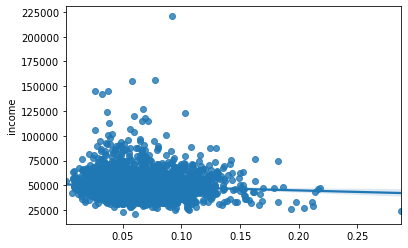

In [11]:
import seaborn as sns
sns.regplot(x=regression["covid-19"]/regression["Total Population"], y=regression["income"])

Text(0.5, 1.0, 'County Level COVID-19 Distribution')

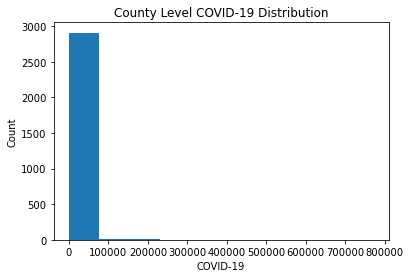

In [6]:
#see the distribution
import matplotlib.pyplot as plt
plt.hist(regression["covid-19"])
plt.xlabel("COVID-19")
plt.ylabel("Count")
plt.title('County Level COVID-19 Distribution')

Text(0.5, 1.0, 'County Level Income Distribution')

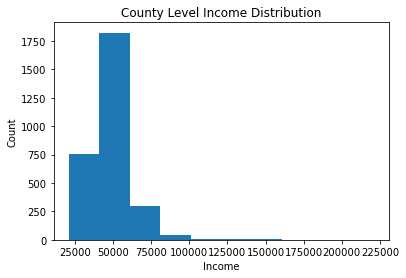

In [12]:
import matplotlib.pyplot as plt
plt.hist(regression["income"])
plt.xlabel("Income")
plt.ylabel("Count")
plt.title('County Level Income Distribution')

In [115]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [41]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [42]:
regression.head()

,county,covid-19,Total Population,gender,poverty,education,ethnicity,white,black,american indian,asian,native hawaiian,income,marriage
0,"Autauga County, Alabama",4190,55639,28587,3504,6932,2117,41582,11352,184,873,22,46814,28932.28000
1,"Baldwin County, Alabama",13601,218289,112400,7250,32804,12686,186495,18001,1291,2029,122,50953,120495.52800
2,"Barbour County, Alabama",1514,25026,11870,3018,1380,1510,11086,11850,58,103,0,37850,9635.01000
3,"Bibb County, Alabama",1834,22374,10352,1875,1207,740,16442,4390,39,26,9,34300,9441.82800
4,"Blount County, Alabama",4641,57755,29078,3834,3667,5771,49764,826,188,174,11,38808,32342.80000


In [5]:
regression['non-white'] = regression['black'] + regression['asian'] + regression['american indian']

In [6]:
regression.to_csv("county_level_regression_analysis.csv")

In [35]:
X = regression[['covid-19', 'gender', 'poverty', 'education', 'white', 'ethnicity', 'non-white']]
y = regression['income']

In [18]:
regression['non-white'].describe()

count      2935.00000
mean      18184.07598
std       82481.23543
min           0.00000
25%         238.50000
50%        1481.00000
75%        7267.50000
max     2253379.00000
Name: non-white, dtype: float64

In [37]:
regression.loc[regression['covid-19'] == 770915]

,county,covid-19,Total Population,gender,poverty,education,ethnicity,white,black,american indian,asian,native hawaiian,income,marriage,non-white
175,"Los Angeles County, California",770915,10040682,5091117,596705,1624101,4804763,2563609,760689,18453,1474237,20522,68272,4307452.57800,2253379


In [32]:
#drop the outliers to see whether there is difference or not
regression.drop(regression.loc[regression['covid-19']==1].index, inplace=True)

In [38]:
#drop the outliers to see there is difference or not
regression.drop(regression.loc[regression['covid-19']==770915].index, inplace=True)

# Regression results

In [14]:
import statsmodels.api as sm
X = regression[['covid-19', 'poverty', 'education', 'gender']]
y = regression['income']
data = sm.add_constant(X)
model = sm.OLS(y, data).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     189.8
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          7.47e-145
Time:                        18:31:30   Log-Likelihood:                -31586.
No. Observations:                2935   AIC:                         6.318e+04
Df Residuals:                    2930   BIC:                         6.321e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.812e+04    227.062    211.929      0.0

In [39]:
import statsmodels.api as sm
data = sm.add_constant(X)
model = sm.OLS(y, data).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sun, 01 May 2022   Prob (F-statistic):          2.13e-146
Time:                        10:24:01   Log-Likelihood:                -31565.
No. Observations:                2934   AIC:                         6.315e+04
Df Residuals:                    2926   BIC:                         6.319e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.778e+04    242.342    197.153      0.0

In [ ]:
covid_income = pd.merge(covid_19_county, control_variables, on = 'county')

In [10]:
covid_19_2020.to_csv("covid_19_county_clean.csv")

In [4]:
covid_19_county = pd.read_csv("covid_19_county_clean.csv")
covid_19_county

,county,state,cases
0,Autauga,Alabama,4190
1,Baldwin,Alabama,13601
2,Barbour,Alabama,1514
3,Bibb,Alabama,1834
4,Blount,Alabama,4641
...,...,...,...
3240,Sweetwater,Wyoming,2966
3241,Teton,Wyoming,2138
3242,Uinta,Wyoming,1558
3243,Washakie,Wyoming,780


In [5]:
covid_19_county.drop(covid_19_county.loc[covid_19_county['state']=='Guam'].index, inplace=True)
covid_19_county.drop(covid_19_county.loc[covid_19_county['state']=='Virgin Islands'].index, inplace=True)
covid_19_county.drop(covid_19_county.loc[covid_19_county['state']=='Northern Mariana Islands'].index, inplace=True)

In [6]:
covid_19_county

,county,state,cases
0,Autauga,Alabama,4190
1,Baldwin,Alabama,13601
2,Barbour,Alabama,1514
3,Bibb,Alabama,1834
4,Blount,Alabama,4641
...,...,...,...
3240,Sweetwater,Wyoming,2966
3241,Teton,Wyoming,2138
3242,Uinta,Wyoming,1558
3243,Washakie,Wyoming,780


In [7]:
income_county = pd.read_csv("income_county_clean.csv")

In [9]:
covid_income = pd.merge(covid_19_county, income_county, on = 'county')

In [15]:
covid_income.to_csv("income_county_2020.csv")

In [16]:
lst = []
for states in covid_county.state:
    lst.append(states)
len(unique(lst))

56

In [17]:
control_variables = pd.read_csv("combine_data.csv")

In [18]:
control_variables

,id,Geographic Area Name,Total Population,Female Total Population,Female Percentage,Male Percentage,Married percentage,50% below the poverty level,Poverty level percentage,High school graduate (includes equivalency) (18-24),...,Not Hispanic nor Latino,Hispanic or Latino population percentage,Not Hispanic nor Lation population percentage,White,Black or African American,American Indian and Alaska Native alone,Asian,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Unnamed: 34
0,0500000US01001,"Autauga County, Alabama",55639,28587,51.38%,48.62%,52.0,3504,6.30%,1723,...,56688,3.80%,96.20%,41582,11352,184,873,22,185,NaN
1,0500000US01003,"Baldwin County, Alabama",218289,112400,51.49%,48.51%,55.2,7250,3.32%,5569,...,219081,5.81%,94.19%,186495,18001,1291,2029,122,775,NaN
2,0500000US01005,"Barbour County, Alabama",25026,11870,47.43%,52.57%,38.5,3018,12.06%,875,...,23713,6.03%,93.97%,11086,11850,58,103,0,63,NaN
3,0500000US01007,"Bibb County, Alabama",22374,10352,46.27%,53.73%,42.2,1875,8.38%,1104,...,21553,3.31%,96.69%,16442,4390,39,26,9,47,NaN
4,0500000US01009,"Blount County, Alabama",57755,29078,50.35%,49.65%,56.0,3834,6.64%,1833,...,53363,9.99%,90.01%,49764,826,188,174,11,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,0500000US72145,"Vega Baja Municipio, Puerto Rico",51089,26669,52.20%,47.80%,38.5,12115,23.71%,1497,...,402,100.00%,0.00%,279,31,9,11,0,23,NaN
3217,0500000US72147,"Vieques Municipio, Puerto Rico",8508,4152,48.80%,51.20%,20.5,2487,29.23%,641,...,663,89.16%,10.84%,533,47,15,3,0,55,NaN
3218,0500000US72149,"Villalba Municipio, Puerto Rico",21899,11310,51.65%,48.35%,35.4,6259,28.58%,567,...,85,97.60%,2.40%,65,3,5,1,0,6,NaN
3219,0500000US72151,"Yabucoa Municipio, Puerto Rico",32867,16984,51.68%,48.33%,34.2,8250,25.10%,402,...,168,92.06%,7.94%,115,12,1,8,2,18,NaN
